In [6]:
import numpy as np

def arm_dist(q):
    return q + np.random.normal(0, 0.01)

In [7]:
arms = {}
n_arms = 10

for i in range(n_arms):
    arms[i] = arm_dist

In [53]:
init_q = .25
eps = [.1, .01, 0]
results = {}

# init q values
arm_values = np.zeros(n_arms)
n_pulled = np.zeros(n_arms)
for i in range(n_arms):
    arm_values[i] = arms[i](init_q)

steps = np.arange(1, 1001, 1)

for ep in eps:
    average_rewards = []
    for step in steps:
        rewards = []
        for _ in range(step):
            # select arm
            # non-greedy case
            if np.random.uniform(0,1) < ep:
                arm = np.random.randint(0, len(arms))
            # greedy case
            else:
                arm = np.argmax(arm_values)
            
            # update arm value
            n_pulled[arm] += 1
            q = arm_values[arm]

            # stationary
            r = np.random.normal(q, 1) # from a normal distribution with mean q_star(A_t) and variance 1, page 29
            rewards.append(r)
            q = q + (r - q)/n_pulled[arm]  
            arm_values[arm] = q
        average_reward = np.mean(np.array(rewards))
        average_rewards.append(average_reward)
    results[ep] = average_rewards

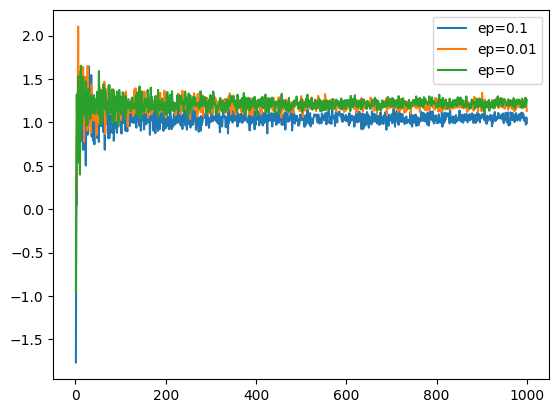

In [54]:
import matplotlib.pyplot as plt

for ep in eps:
    plt.plot(steps, results[ep], label=f'ep={ep}')
plt.legend()
plt.show()

In [69]:
from tqdm import tqdm

init_q = .25
alpha = 0.1
eps = [.1, .01, 0]
results = {}

# init q values
arm_values = np.zeros(n_arms)
n_pulled = np.zeros(n_arms)
for i in range(n_arms):
    arm_values[i] = arms[i](init_q)

steps = np.arange(1, 1001, 1)

for ep in tqdm(eps, total=len(eps)):
    average_rewards = []
    for step in tqdm(steps, total=len(steps)):
        rewards = []
        for _ in range(step):
            # select arm
            # non-greedy case
            if np.random.uniform(0,1) < ep:
                arm = np.random.randint(0, len(arms))
            # greedy case
            else:
                arm = np.argmax(arm_values)
            
            # update arm value
            n_pulled[arm] += 1
            q = arm_values[arm]

            # non-stationary
            r = np.random.normal(q, 1) # from a normal distribution with mean q_star(A_t) and variance 1, page 29
            rewards.append(r)
            # q = q + alpha*(r - q)  # not sure if this is right
            q = (((1-alpha)**len(rewards))*init_q) + sum([(alpha*(1-alpha)**(len(rewards)-i))*reward for i, reward in enumerate(rewards)]) # 2.6 page 32
            arm_values[arm] = q
        average_reward = np.mean(np.array(rewards))
        average_rewards.append(average_reward)
    results[ep] = average_rewards

100%|██████████| 3/3 [02:51<00:00, 57.17s/it]


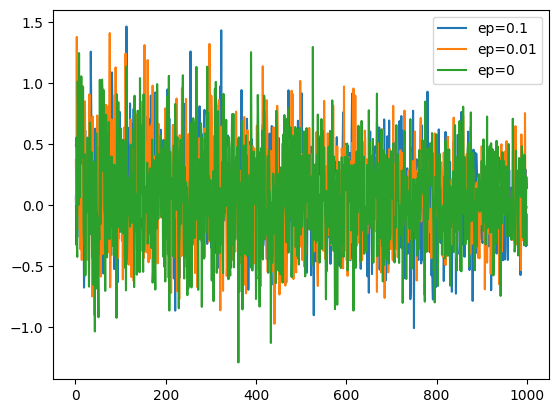

In [70]:
import matplotlib.pyplot as plt

for ep in eps:
    plt.plot(steps, results[ep], label=f'ep={ep}')
plt.legend()
plt.show()